In [92]:
import pandas as pd
from matplotlib import pyplot as plt
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.fbprophet import Prophet
from sktime.utils.plotting import plot_series
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [93]:
weather = pd.read_csv("delhi_data_set.csv", index_col="DATE")
weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12', '2023-05-13',
       '2023-05-14', '2023-05-15', '2023-05-16', '2023-05-17', '2023-05-18'],
      dtype='object', name='DATE', length=22272)

In [94]:
weather.index = pd.to_datetime(weather.index,dayfirst = True)

In [95]:
weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12',
               '2023-05-13', '2023-05-14', '2023-05-15', '2023-05-16',
               '2023-05-17', '2023-05-18'],
              dtype='datetime64[ns]', name='DATE', length=22272, freq=None)

In [96]:
weather = weather.asfreq("D")

In [97]:
weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12',
               '2023-05-13', '2023-05-14', '2023-05-15', '2023-05-16',
               '2023-05-17', '2023-05-18'],
              dtype='datetime64[ns]', name='DATE', length=23149, freq='D')

In [98]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.037885
NAME       0.037885
PRCP       0.377381
SNWD       0.999914
TAVG       0.179835
TMAX       0.291157
TMIN       0.315305
dtype: float64

In [99]:
del weather['STATION']
del weather['NAME']
del weather['SNWD']
del weather['PRCP']

In [100]:
weather.apply(pd.isnull).sum()/weather.shape[0]

TAVG    0.179835
TMAX    0.291157
TMIN    0.315305
dtype: float64

In [101]:
weather[pd.isnull(weather["TMIN"])]

,TAVG,TMAX,TMIN
DATE,,,
1960-01-01,NaN,NaN,NaN
1960-01-02,NaN,NaN,NaN
1960-01-03,NaN,NaN,NaN
1960-01-04,NaN,NaN,NaN
1960-01-05,NaN,NaN,NaN
...,...,...,...
2023-03-20,68.0,82.0,NaN
2023-03-30,72.0,92.0,NaN
2023-04-07,77.0,92.0,NaN


In [102]:
weather["TMIN"].value_counts()

81.0    761
79.0    712
77.0    706
80.0    568
78.0    551
       ... 
34.0      4
96.0      1
98.0      1
94.0      1
33.0      1
Name: TMIN, Length: 65, dtype: int64

In [103]:
weather.isnull().sum()

TAVG    4163
TMAX    6740
TMIN    7299
dtype: int64

In [104]:
weather['TMIN'] = weather['TMIN'].interpolate(option='spline')

In [105]:
weather["TMIN"].value_counts()

81.000000    849
79.000000    830
77.000000    792
80.000000    661
78.000000    635
            ... 
39.162931      1
39.165664      1
39.168398      1
39.171132      1
49.250000      1
Name: TMIN, Length: 4361, dtype: int64

In [106]:
weather["TMAX"].value_counts()

95.0     759
93.0     650
94.0     600
91.0     597
99.0     592
        ... 
118.0      1
117.0      1
116.0      1
53.0       1
50.0       1
Name: TMAX, Length: 68, dtype: int64

In [107]:
weather['TMAX'] = weather['TMAX'].interpolate(option='spline')

In [108]:
weather["TMAX"].value_counts()

95.000000    807
93.000000    695
94.000000    640
96.000000    635
99.000000    618
            ... 
86.534357      1
86.536244      1
86.538130      1
86.540016      1
81.750000      1
Name: TMAX, Length: 4945, dtype: int64

In [109]:
weather["TAVG"].value_counts()

87.0     858
85.0     799
83.0     754
89.0     739
86.0     678
        ... 
45.0       6
44.0       5
104.0      3
41.0       1
42.0       1
Name: TAVG, Length: 63, dtype: int64

In [110]:
weather['TAVG'] = weather['TAVG'].interpolate(option='spline')

In [111]:
weather["TAVG"].value_counts()

87.000000    860
85.000000    802
83.000000    758
89.000000    741
86.000000    679
            ... 
51.409414      1
51.410783      1
51.412151      1
51.413519      1
70.666667      1
Name: TAVG, Length: 4093, dtype: int64

In [112]:
weather.isnull().sum()

TAVG    5
TMAX    5
TMIN    5
dtype: int64

In [113]:
weather = weather.fillna(method="ffill")

In [114]:
weather.isnull().sum()

TAVG    5
TMAX    5
TMIN    5
dtype: int64

In [115]:
weather[pd.isnull(weather["TMIN"])]

,TAVG,TMAX,TMIN
DATE,,,
1960-01-01,NaN,NaN,NaN
1960-01-02,NaN,NaN,NaN
1960-01-03,NaN,NaN,NaN
1960-01-04,NaN,NaN,NaN
1960-01-05,NaN,NaN,NaN


In [116]:
weather = weather.loc['1975-01-01':'2023-05-18']

In [117]:
weather.index.year.value_counts().sort_index()

1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    138
Name: DATE, dtype: int64

In [118]:
weather.index

DatetimeIndex(['1975-01-01', '1975-01-02', '1975-01-03', '1975-01-04',
               '1975-01-05', '1975-01-06', '1975-01-07', '1975-01-08',
               '1975-01-09', '1975-01-10',
               ...
               '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12',
               '2023-05-13', '2023-05-14', '2023-05-15', '2023-05-16',
               '2023-05-17', '2023-05-18'],
              dtype='datetime64[ns]', name='DATE', length=17670, freq='D')

In [119]:
weather.isnull().sum()

TAVG    0
TMAX    0
TMIN    0
dtype: int64

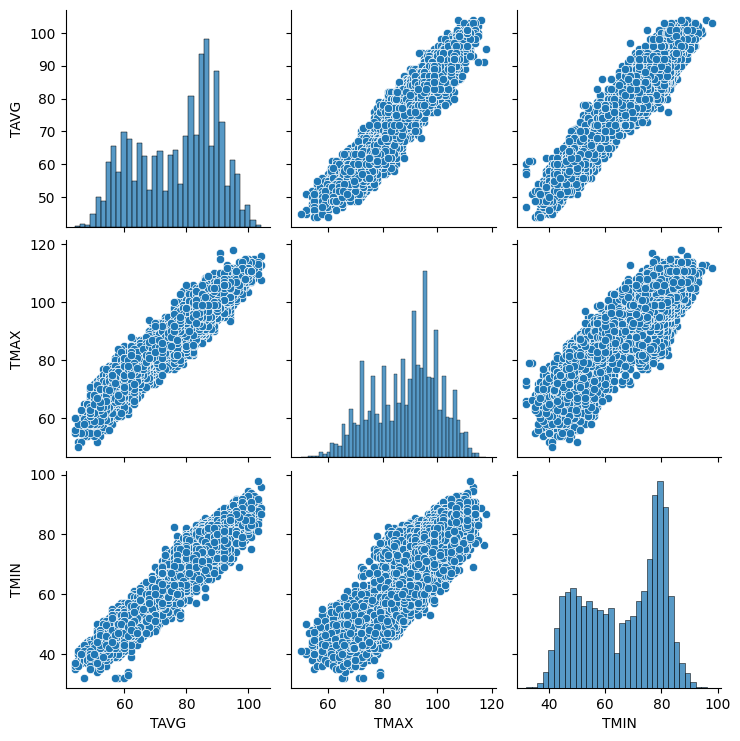

In [120]:
sns.pairplot(weather)

<Axes: >

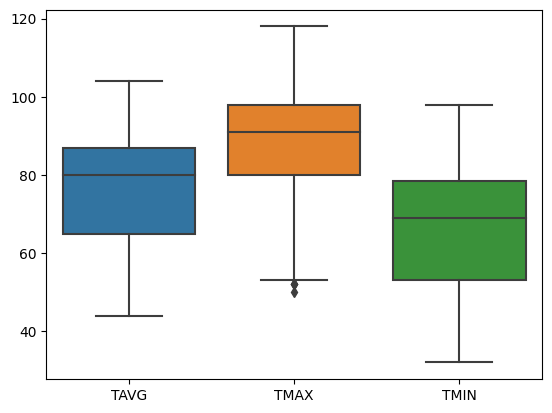

In [121]:
sns.boxplot(weather)

<Axes: xlabel='DATE'>

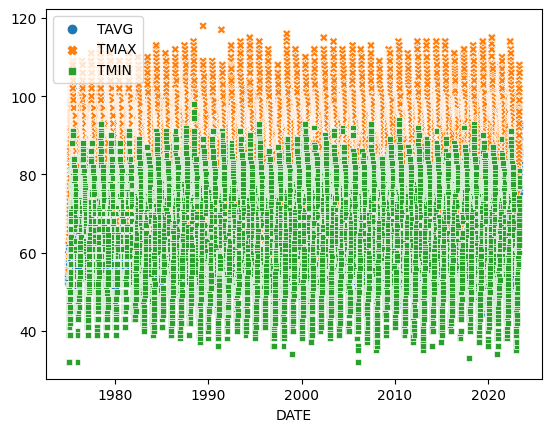

In [122]:
sns.scatterplot(weather)

<Axes: xlabel='DATE'>

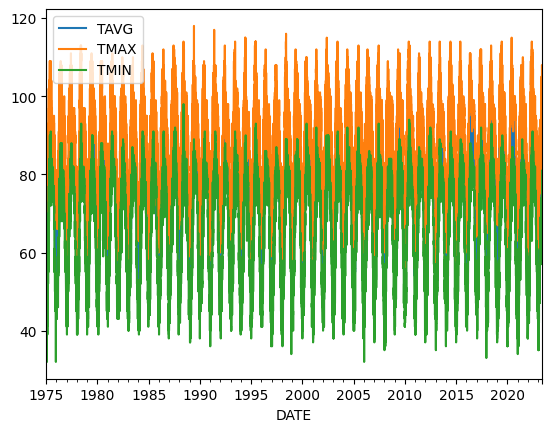

In [123]:
weather.plot()

C:\Users\Harsh\AppData\Local\Temp\ipykernel_15240\3450579783.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather)


<Axes: ylabel='Density'>

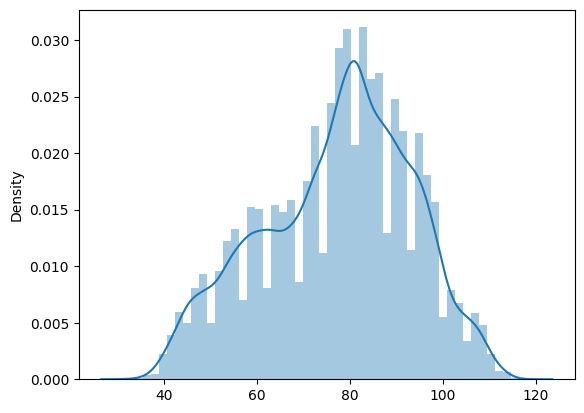

In [124]:
sns.distplot(weather)

In [125]:
data_adfuller_test = adfuller(weather.TMAX, autolag = 'AIC')

In [126]:
data_adfuller_test[0]

-13.381104303989689

In [127]:
data_adfuller_test[1]

4.975953056751733e-25

In [128]:
data_adfuller_test[4]

{'1%': -3.4307210781647015,
 '5%': -2.8617040022896933,
 '10%': -2.5668572941489867}

In [129]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [130]:
dtr = DecisionTreeRegressor()

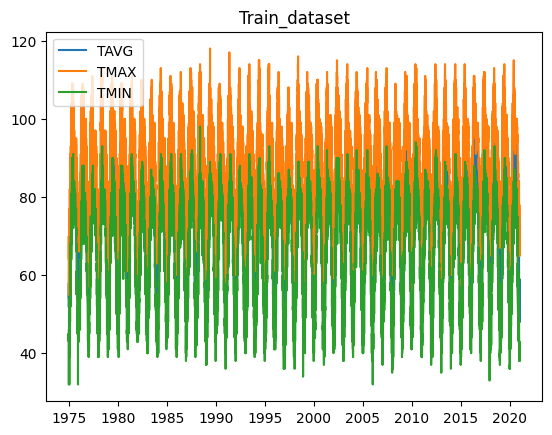

In [131]:
train = weather.loc[weather.index < '2020-12-31']
test = weather.loc[weather.index >= '2020-12-31']
plt.plot(train)
plt.title("Train_dataset")
plt.legend(["TAVG","TMAX","TMIN"])
plt.show()

<Axes: xlabel='DATE'>

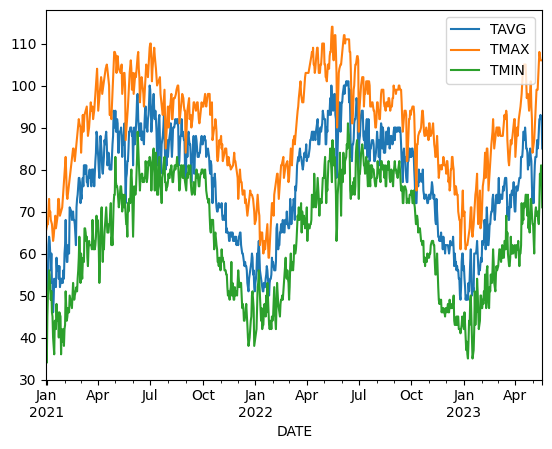

In [132]:
test[["TAVG","TMAX","TMIN"]].plot()

In [133]:
predictors = ["TAVG","TMIN"]
target = "TMAX"
x_train = train[predictors]
y_train = train[target]
x_test = test[predictors]
y_test = test[target]

In [134]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [135]:
pred = dtr.predict(x_test)

In [136]:
r2_score(y_test, pred)

0.9149768853150007

In [137]:
pred = pd.DataFrame(pred, index=test.index, columns =['tmax'])

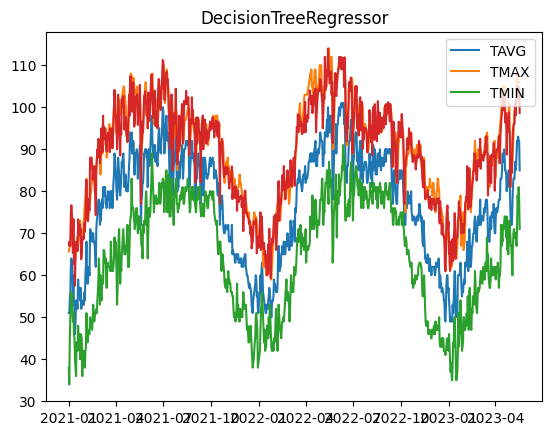

In [138]:
df = test.merge(pred, how='left', left_index=True, right_index=True)
plt.plot(df)
plt.title("DecisionTreeRegressor")
plt.legend(["TAVG","TMAX","TMIN"])
plt.show()

In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
lr = LinearRegression()

In [141]:
model = lr.fit(x_train, y_train)

In [142]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 14.149407821065637
betas = [ 1.38979597 -0.48669085]


In [143]:
pred_lr = model.predict(x_test)

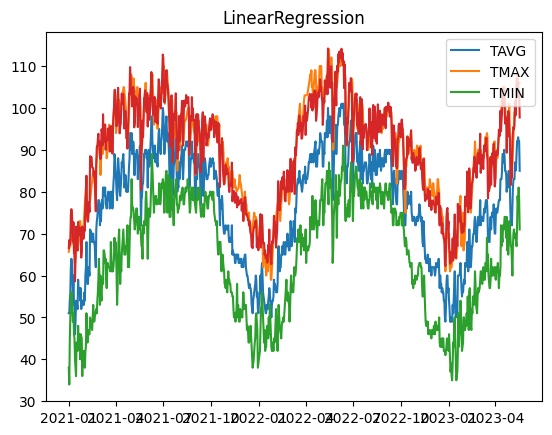

In [144]:
pred_lr = pd.DataFrame(pred_lr, index=test.index, columns =['tmax'])
df = test.merge(pred_lr, how='left', left_index=True, right_index=True)
plt.plot(df)
plt.title("LinearRegression")
plt.legend(["TAVG","TMAX","TMIN"])
plt.show()

In [145]:
r2_score(y_test, pred_lr)

0.9209475602175184

In [146]:
import xgboost as xgb

In [147]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', n_estimators=1000,early_stopping_rounds=50,objective='reg:linear',max_depth=3,learning_rate=0.01)

In [148]:
reg.fit(x_train, y_train,eval_set=[(x_train, y_train),(x_test, y_test)],verbose=100)

[00:13:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:88.22356	validation_1-rmse:89.29373
[100]	validation_0-rmse:32.47285	validation_1-rmse:33.72389
[200]	validation_0-rmse:12.25873	validation_1-rmse:13.44726
[300]	validation_0-rmse:5.29674	validation_1-rmse:6.38376
[400]	validation_0-rmse:3.35298	validation_1-rmse:4.24030
[500]	validation_0-rmse:2.95163	validation_1-rmse:3.66587
[600]	validation_0-rmse:2.86916	validation_1-rmse:3.50463
[700]	validation_0-rmse:2.84141	validation_1-rmse:3.45317
[800]	validation_0-rmse:2.82016	validation_1-rmse:3.42872
[900]	validation_0-rmse:2.80622	validation_1-rmse:3.41783
[999]	validation_0-rmse:2.79621	validation_1-rmse:3.41316


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [149]:
pred_xg = reg.predict(x_test)

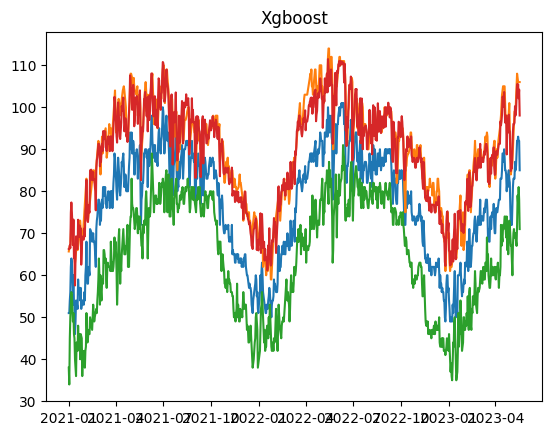

In [150]:
pred_xg = pd.DataFrame(pred_xg, index=test.index, columns =['tmax'])
df = test.merge(pred_xg, how='left', left_index=True, right_index=True)
plt.plot(df)
plt.title("Xgboost")
plt.show()

In [151]:
r2_score(y_test, pred_xg)

0.9248241012524577

In [152]:
forecaster = Prophet()

In [153]:
predictors_2 = ["TAVG","TMAX"]
target_2 = "TMIN"
x_train_2 = train[predictors_2]
y_train_2 = train[target_2]
x_test_2 = test[predictors_2]
y_test_2 = test[target_2]

In [154]:
forecaster.fit(y_train)

00:13:40 - cmdstanpy - INFO - Chain [1] start processing
00:13:46 - cmdstanpy - INFO - Chain [1] done processing


Prophet()

In [155]:
horizon_test = 850
testing_fut = ForecastingHorizon(pd.date_range(str('2020-12-31'),periods=horizon_test,freq="D"),is_relative=False,)

In [156]:
pred_prop = forecaster.predict(testing_fut)

In [157]:
pred_prop = pred_prop.to_frame()

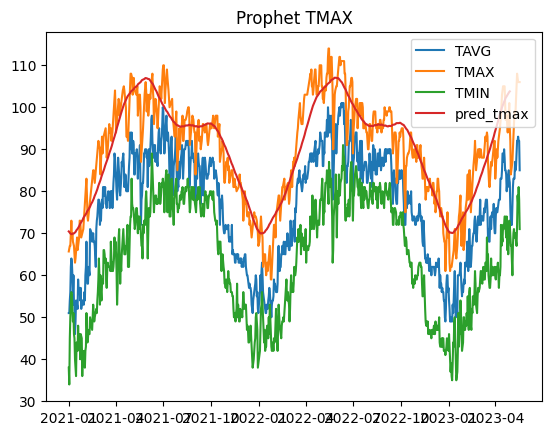

In [158]:
df = test.merge(pred_prop, how='left', left_index=True, right_index=True)
plt.plot(df)
plt.title("Prophet TMAX")
plt.legend(["TAVG","TMAX","TMIN","pred_tmax"])
plt.show()

In [159]:
forecaster.fit(y_train_2)

00:13:56 - cmdstanpy - INFO - Chain [1] start processing
00:13:59 - cmdstanpy - INFO - Chain [1] done processing


Prophet()

In [160]:
pred_prop_2 = forecaster.predict(testing_fut)

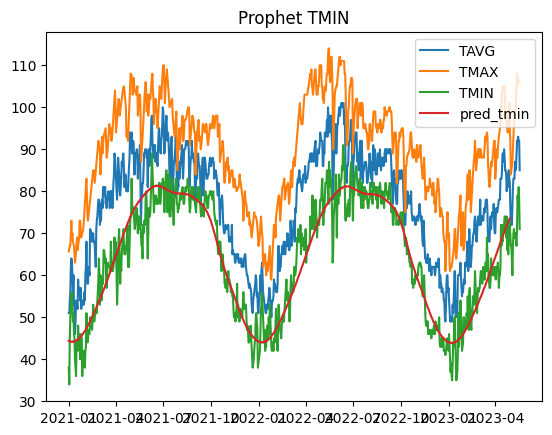

In [161]:
pred_prop_2 = pred_prop_2.to_frame()
df = test.merge(pred_prop_2, how='left', left_index=True, right_index=True)
plt.plot(df)
plt.title("Prophet TMIN")
plt.legend(["TAVG","TMAX","TMIN","pred_tmin"])
plt.show()

In [162]:
horizon = 2548
future = ForecastingHorizon(pd.date_range(str('2020-12-31'),periods=horizon,freq="D"),is_relative=False,)

In [163]:
x_all = weather[predictors]
y_all = weather[target]
x_all_2 = weather[predictors_2]
y_all_2 = weather[target_2]

In [164]:
mMax = forecaster.fit(y_all)

00:14:09 - cmdstanpy - INFO - Chain [1] start processing
00:14:15 - cmdstanpy - INFO - Chain [1] done processing


In [165]:
TMAX_pred = forecaster.predict(future)

<Axes: >

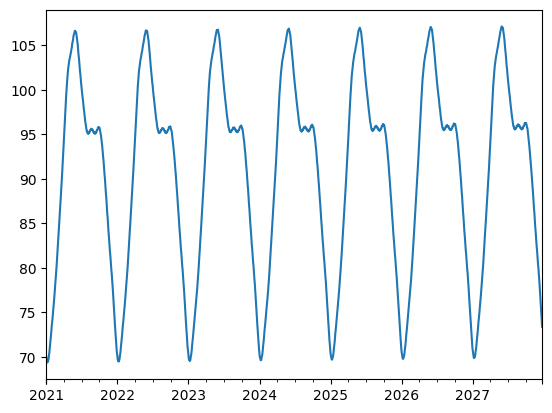

In [166]:
TMAX_pred.plot()

<Axes: xlabel='DATE'>

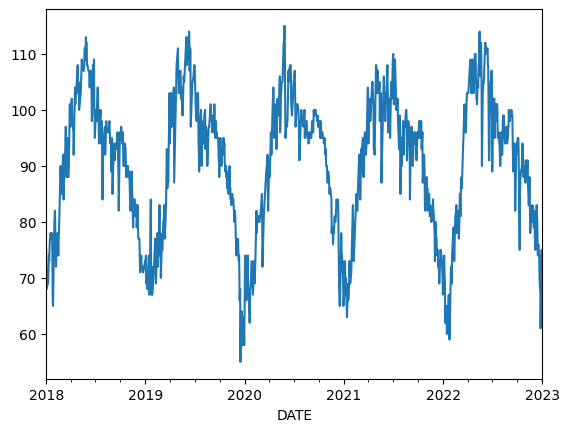

In [167]:
testing_pred = weather.loc['2018-01-01':'2023-01-01']
testing_pred["TMAX"].plot()

In [168]:
mMin = forecaster.fit(y_all_2)

00:14:26 - cmdstanpy - INFO - Chain [1] start processing
00:14:30 - cmdstanpy - INFO - Chain [1] done processing


In [169]:
TMIN_pred = forecaster.predict(future)

<Axes: >

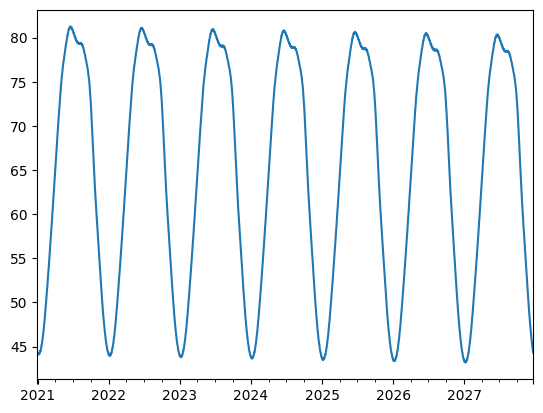

In [170]:
TMIN_pred.plot()

<Axes: xlabel='DATE'>

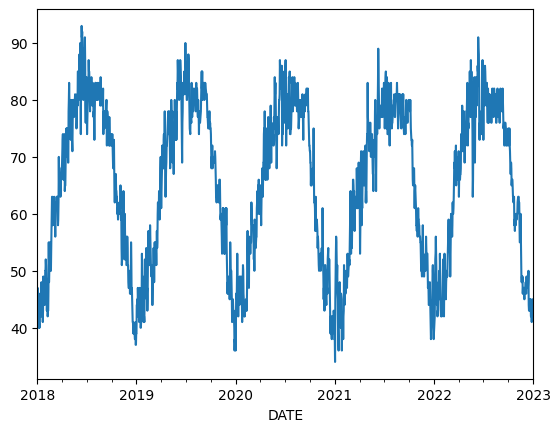

In [171]:
testing_pred["TMIN"].plot()

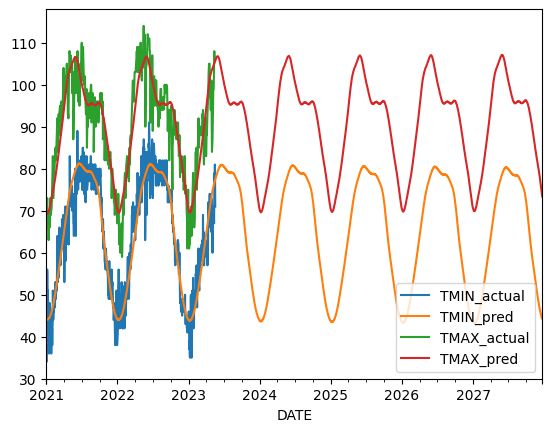

In [172]:
aMin = test["TMIN"].plot()
ayu = TMIN_pred.plot(ax=aMin)
aMax = test["TMAX"].plot()
ayx = TMAX_pred.plot(ax=aMax)
ayx.plot(ax=ayu)
plt.legend(["TMIN_actual","TMIN_pred","TMAX_actual","TMAX_pred"])
plt.show()

In [173]:
TMAX_pred.loc['2023-12-31']

70.41986658486314

In [174]:
TMIN_pred.loc['2023-12-31']

43.918072015564675

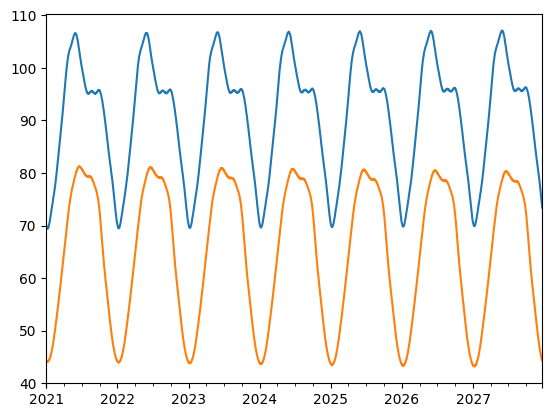

In [175]:
ax = TMAX_pred.plot(y='TMAX')
TMIN_pred.plot(ax=ax, y='TMIN')
plt.show()

In [176]:
TMAX_pred = TMAX_pred.to_frame()

In [177]:
TMIN_pred = TMIN_pred.to_frame()

In [178]:
final_set = TMAX_pred.merge(TMIN_pred, how='left', left_index=True, right_index=True)

In [179]:
final_set

,TMAX,TMIN
2020-12-31,70.117814,44.340257
2021-01-01,69.962699,44.333878
2021-01-02,69.765664,44.166166
2021-01-03,69.581643,44.190579
2021-01-04,69.498228,44.140011
...,...,...
2027-12-18,74.923121,44.782851
2027-12-19,74.490060,44.678951
2027-12-20,74.131739,44.498521
2027-12-21,73.749289,44.352481


In [180]:
TMAX_pred["TMAX"].sum()/TMAX_pred["TMAX"].count()

90.86222960461498

In [181]:
final_set.index

DatetimeIndex(['2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03',
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-09',
               ...
               '2027-12-13', '2027-12-14', '2027-12-15', '2027-12-16',
               '2027-12-17', '2027-12-18', '2027-12-19', '2027-12-20',
               '2027-12-21', '2027-12-22'],
              dtype='datetime64[ns]', length=2548, freq=None)

In [188]:
flag = 1
def UseMe(final_set):
    date = ""
    date = input("Enter the date YYYY-MM-DD ")
    print(final_set.loc[date])

In [189]:
while flag == 1:
    flag = int(input("Press 1 to check temperature 0 to exit"))
    if flag == 1:
        UseMe(final_set)


Press 1 to check temperature 0 to exit1
Enter the date YYYY-MM-DD 2023-07-03
TMAX    100.127490
TMIN     80.365724
Name: 2023-07-03 00:00:00, dtype: float64
Press 1 to check temperature 0 to exit1
Enter the date YYYY-MM-DD 2023-07-04
TMAX    99.901997
TMIN    80.307573
Name: 2023-07-04 00:00:00, dtype: float64
Press 1 to check temperature 0 to exit1
Enter the date YYYY-MM-DD 2023-06-12
TMAX    105.119408
TMIN     80.652696
Name: 2023-06-12 00:00:00, dtype: float64
Press 1 to check temperature 0 to exit0


In [399]:
#saving model
import pickle
with open("model_min.pkl", "wb") as f:
    pickle.dump(mMin, f)
'''Opening saved model
with open("desired-model-file-name.pkl", "rb") as file:
    model = pickle.load(file)'''